In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5)})


In [2]:
import networkx as nx
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:


dfnodes = pd.read_excel('Nodes.xlsx', index_col='id')
print (dfnodes)


                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.437114   6.761135  164.60
2   Mülheim an der Ruhr  51.413756   6.880615   57.10
3         Essen_Botrrop  51.505071   6.974214  229.51
4             Dortmund   51.525959   7.437896  188.87
5       Castrop Rauxel   51.584794   7.295763   24.42
6                Herne   51.554442   7.199320   51.81
7        Gelsenkirchen   51.544816   7.095038   85.75
8            Oberhausen  51.482544   6.824161   70.61
9             Dinslaken  51.561551   6.692193   22.50
10                 Hamm  51.674988   7.754103   59.08
11               Voerde  51.581030   6.654284   11.94
12                Wesel  51.662911   6.588569   20.05
13                Hünxe  51.645494   6.766333    4.56
14              Dorsten  51.664197   6.953059   24.90
15      Haltern am See   51.727077   7.183836   12.82
16              Datteln  51.633752   7.339983   11.82
17                Lünen  51.

In [4]:

dfedges = pd.read_excel('Edges.xlsx')
print (dfedges)

    source  target  distance  time  price
0        1       2     21.05  4.33   0.63
1        1       8     19.50  3.41   0.60
2        1       9     27.00  2.83   0.80
3        1      21     31.84  3.16   0.95
4        3       7      9.55  1.70   0.29
5        3       8      6.50  0.70   0.20
6        4      16     17.60  2.88   0.53
7        4       5     20.17  3.15   0.60
8        5       6      7.85  1.53   0.25
9        5      16      7.05  0.75   0.21
10       6       7      9.13  1.65   0.28
11       9      11      5.00  0.50   0.15
12       9      21     10.00  1.03   0.30
13      10      17     22.52  2.25   0.68
14      11      21      4.90  0.50   0.15
15      11      12     13.80  1.38   0.41
16      12      13     13.91  2.13   0.42
17      12      20      9.82  0.98   0.30
18      12      21      9.78  1.01   0.30
19      13      14     15.05  2.25   0.45
20      14      19     10.21  1.76   0.31
21      15      16     18.58  4.11   0.55
22      15      19      7.54  0.75

In [5]:
dfedges.columns


Index(['source', 'target', 'distance', 'time', 'price'], dtype='object')

In [6]:
G = nx.from_pandas_edgelist(dfedges, 'source','target',['distance', 'time','price'],create_using=nx.Graph)

In [7]:
print(dfnodes)

                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.437114   6.761135  164.60
2   Mülheim an der Ruhr  51.413756   6.880615   57.10
3         Essen_Botrrop  51.505071   6.974214  229.51
4             Dortmund   51.525959   7.437896  188.87
5       Castrop Rauxel   51.584794   7.295763   24.42
6                Herne   51.554442   7.199320   51.81
7        Gelsenkirchen   51.544816   7.095038   85.75
8            Oberhausen  51.482544   6.824161   70.61
9             Dinslaken  51.561551   6.692193   22.50
10                 Hamm  51.674988   7.754103   59.08
11               Voerde  51.581030   6.654284   11.94
12                Wesel  51.662911   6.588569   20.05
13                Hünxe  51.645494   6.766333    4.56
14              Dorsten  51.664197   6.953059   24.90
15      Haltern am See   51.727077   7.183836   12.82
16              Datteln  51.633752   7.339983   11.82
17                Lünen  51.

In [8]:
dfnodes.columns

Index(['city', 'latitude', 'longitude', 'demand'], dtype='object')

In [9]:
nx.set_node_attributes(G, dfnodes['city'], 'city')
nx.set_node_attributes(G, dfnodes['demand'], 'demand')
nx.set_node_attributes(G, dfnodes['latitude'], 'lat')
nx.set_node_attributes(G, dfnodes['longitude'], 'long')

In [11]:
import math
pos = dict()
for v in G.nodes:
    long = G.nodes[v]['long']
    lat = G.nodes[v]['lat']
    pos[v] = ((long + 90) * math.cos(2 * math.pi * lat / 360), lat)
    #print(pos[v])

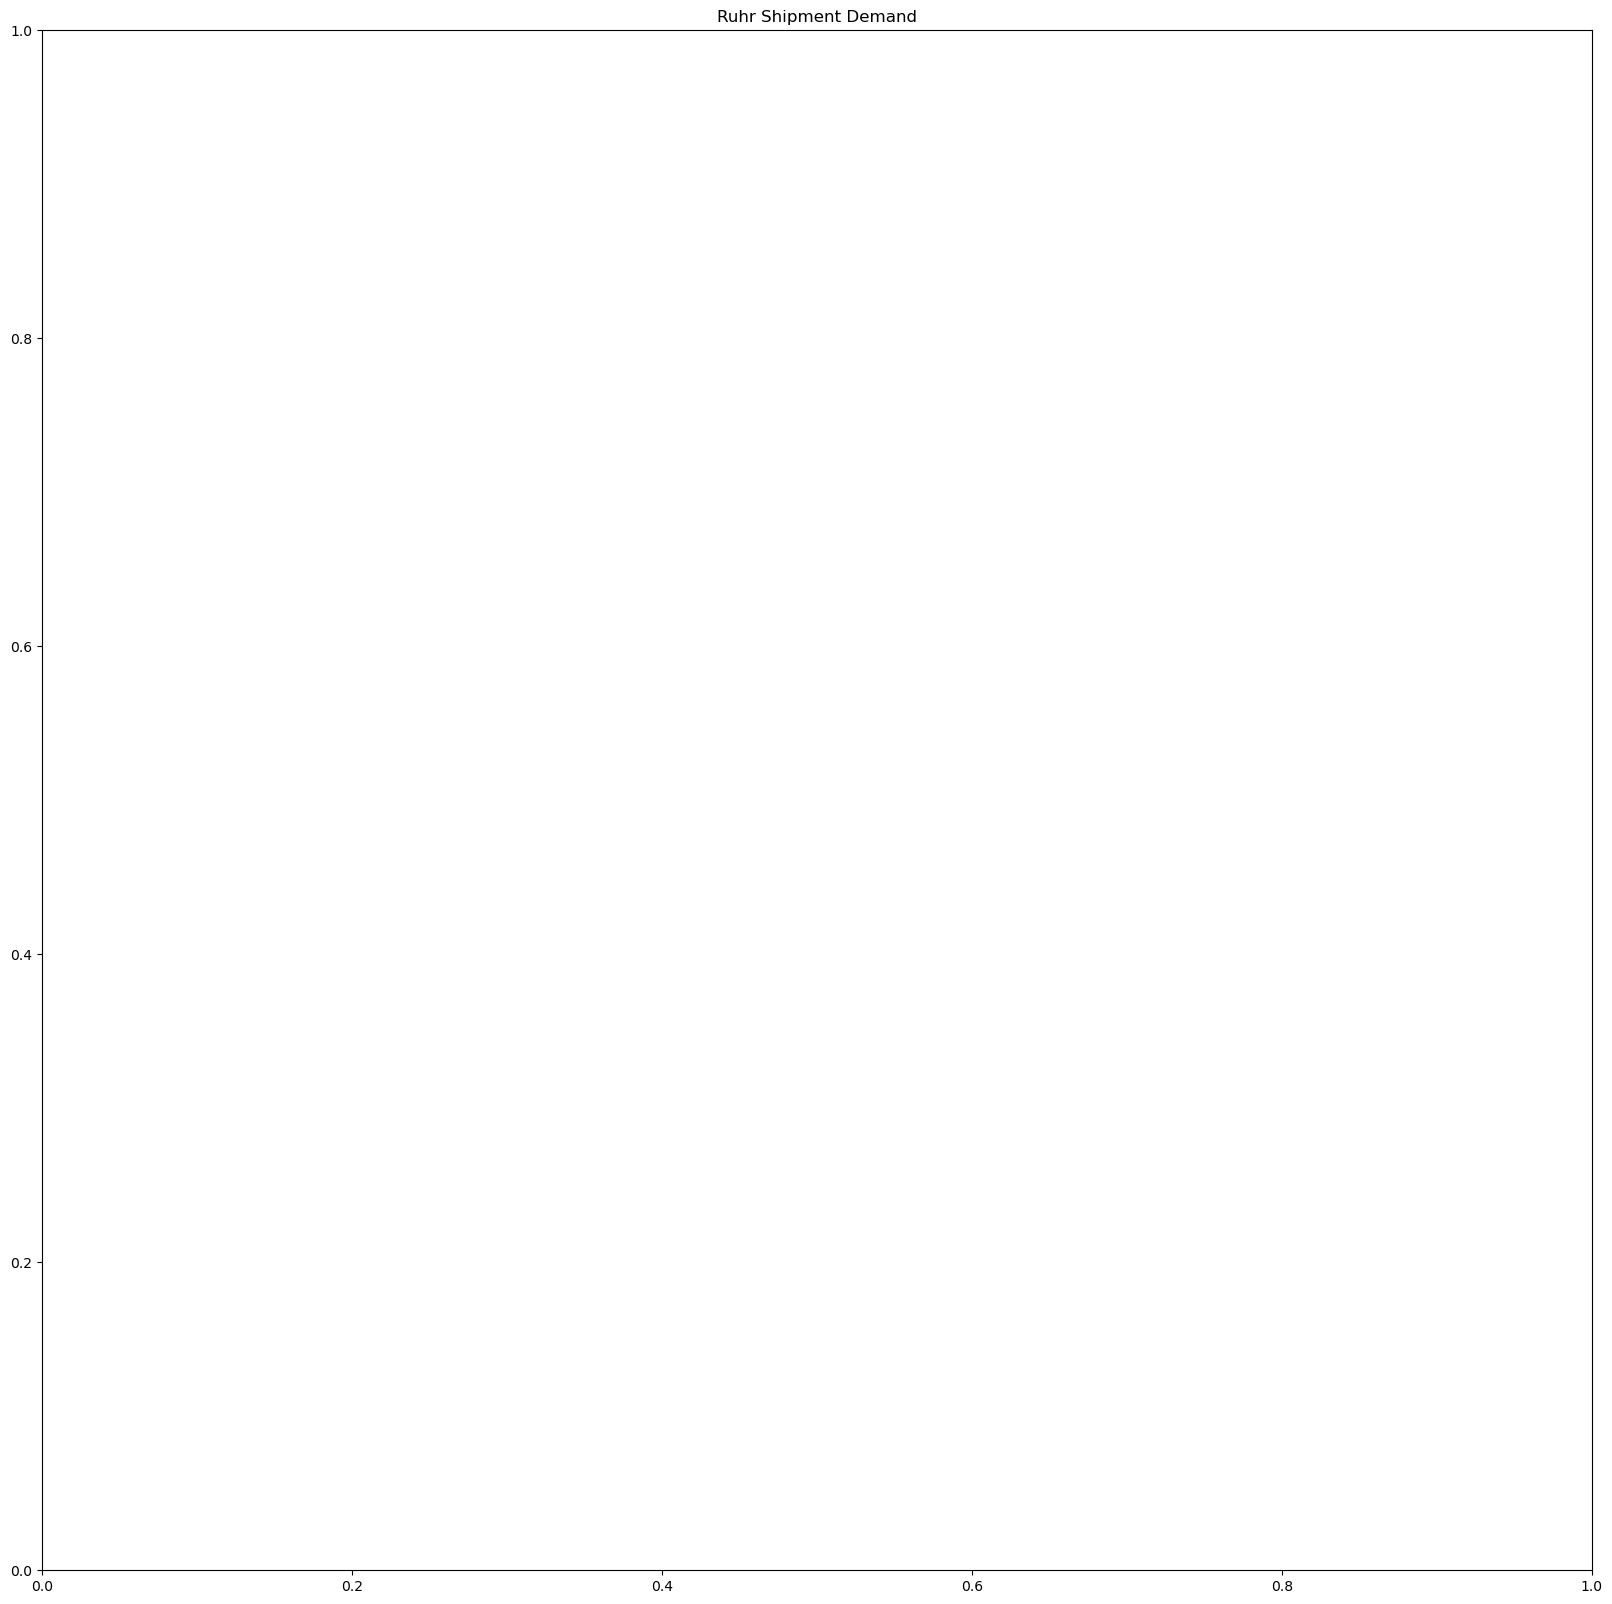

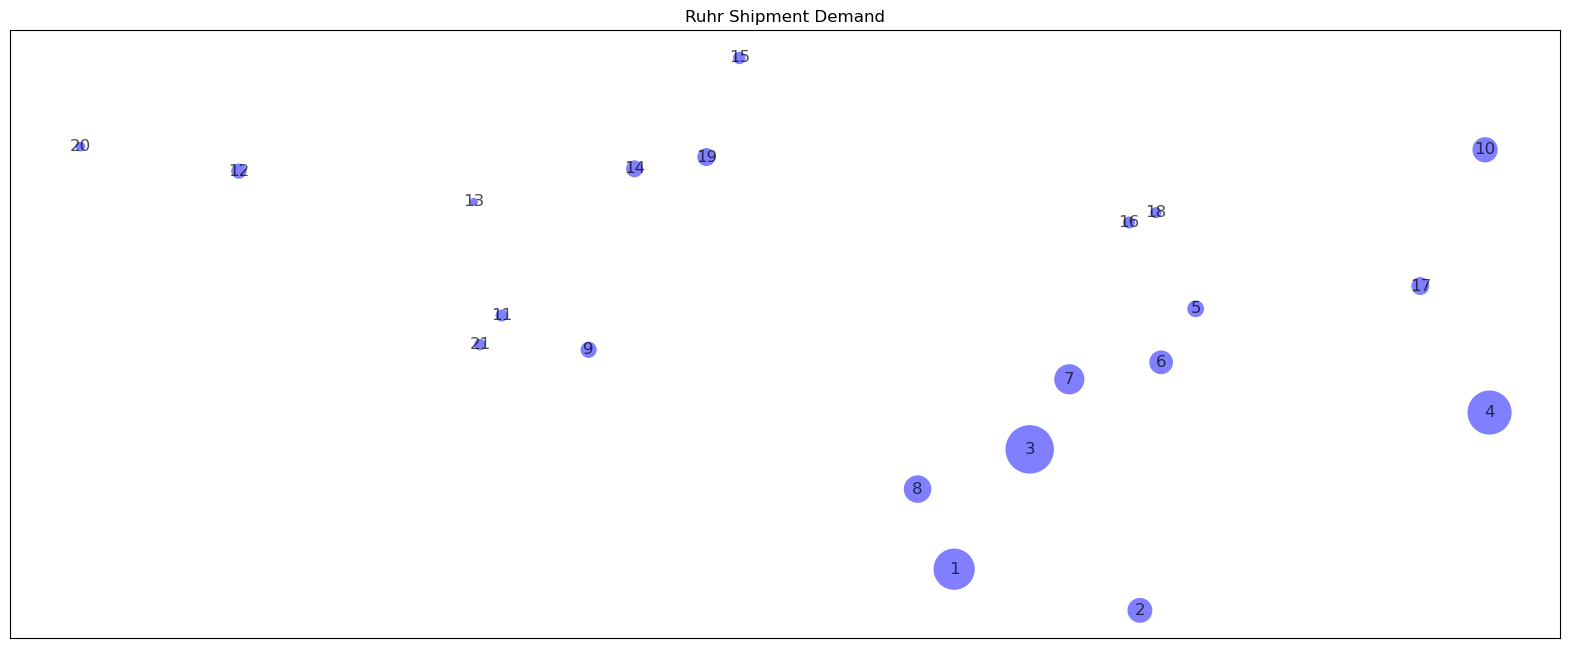

In [12]:
# Draw network 

d = dict(dfnodes['demand'])
#pos = nx.spring_layout(G, seed=7) 
fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Demand')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx_nodes(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')

ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)

fig.savefig('ruhr shipment graph nodes')
plt.show()

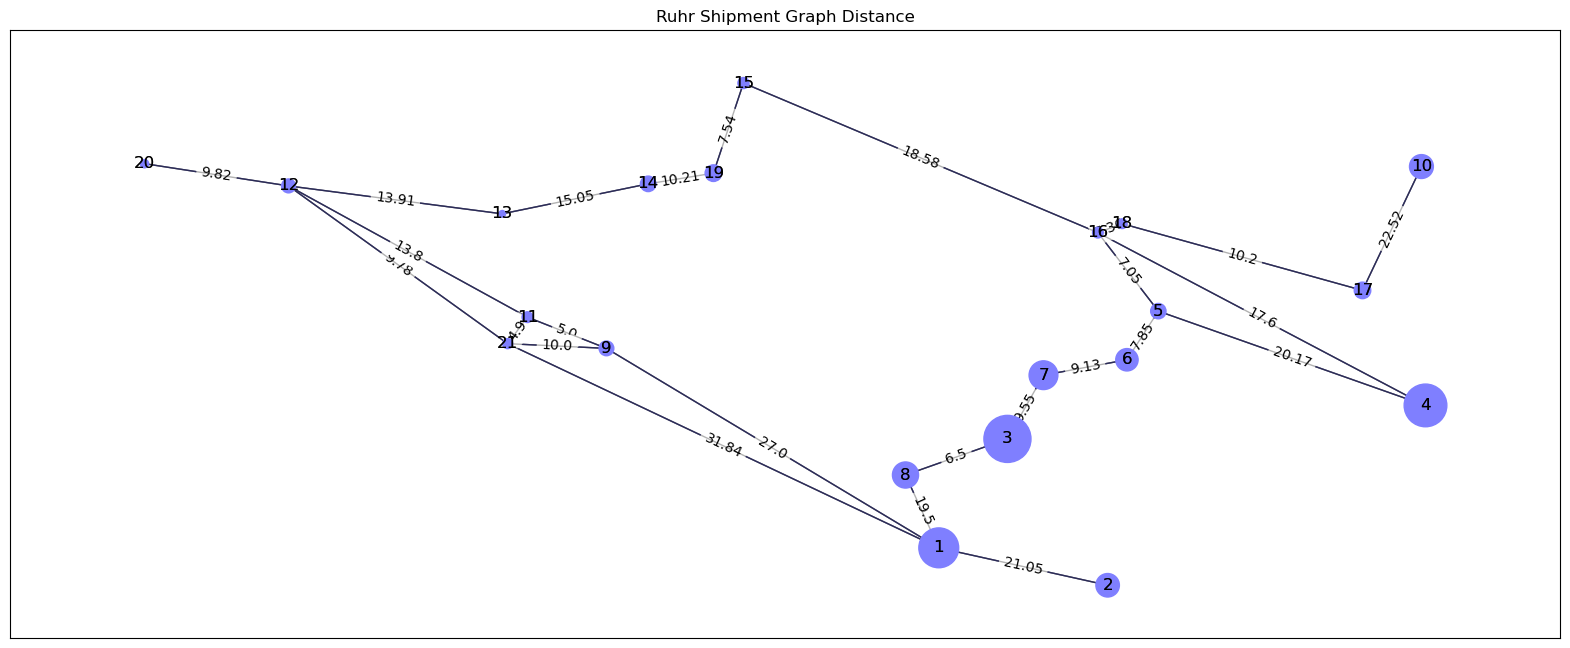

In [13]:
# Draw network 


#pos = nx.spring_layout(G, seed=7) 
fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Distance')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'distance') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph distance')
plt.show()

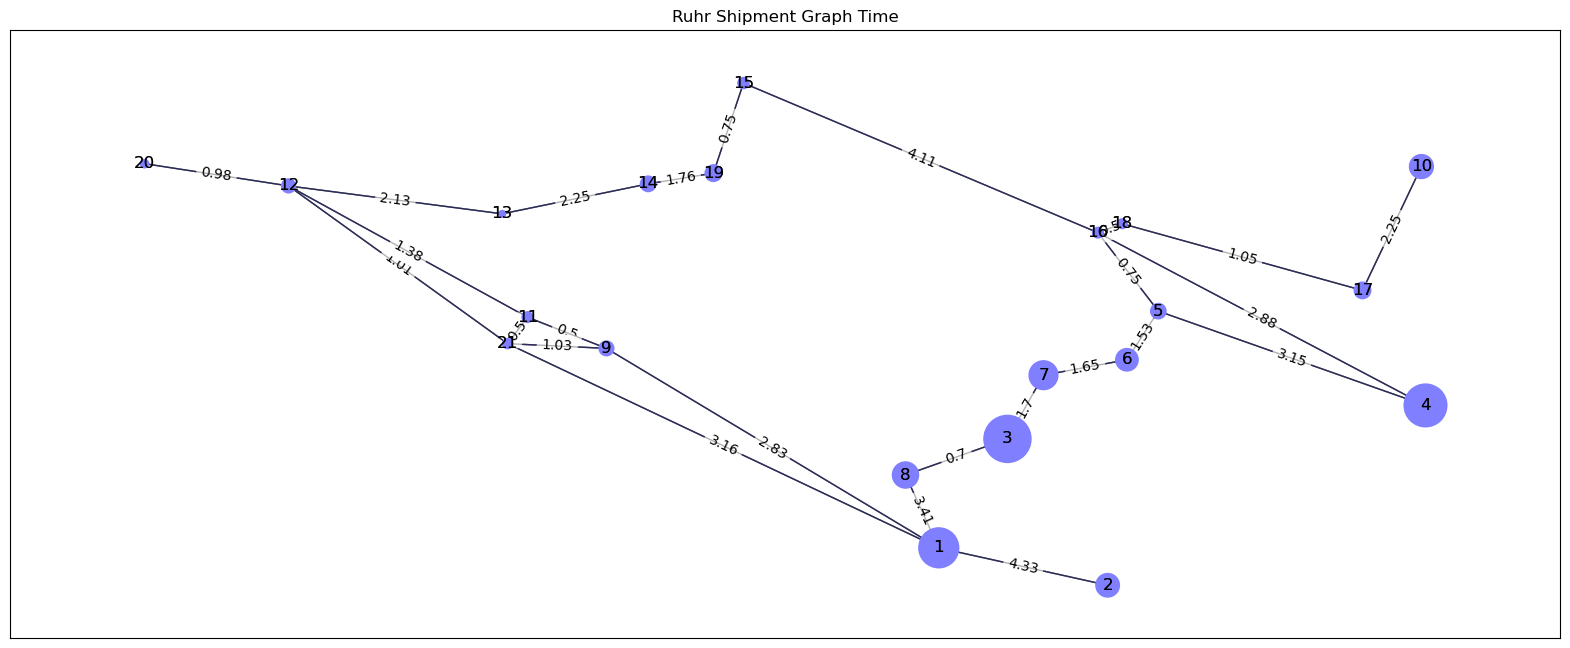

In [14]:
# Draw network 



fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Time')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'time') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph time')
plt.show()

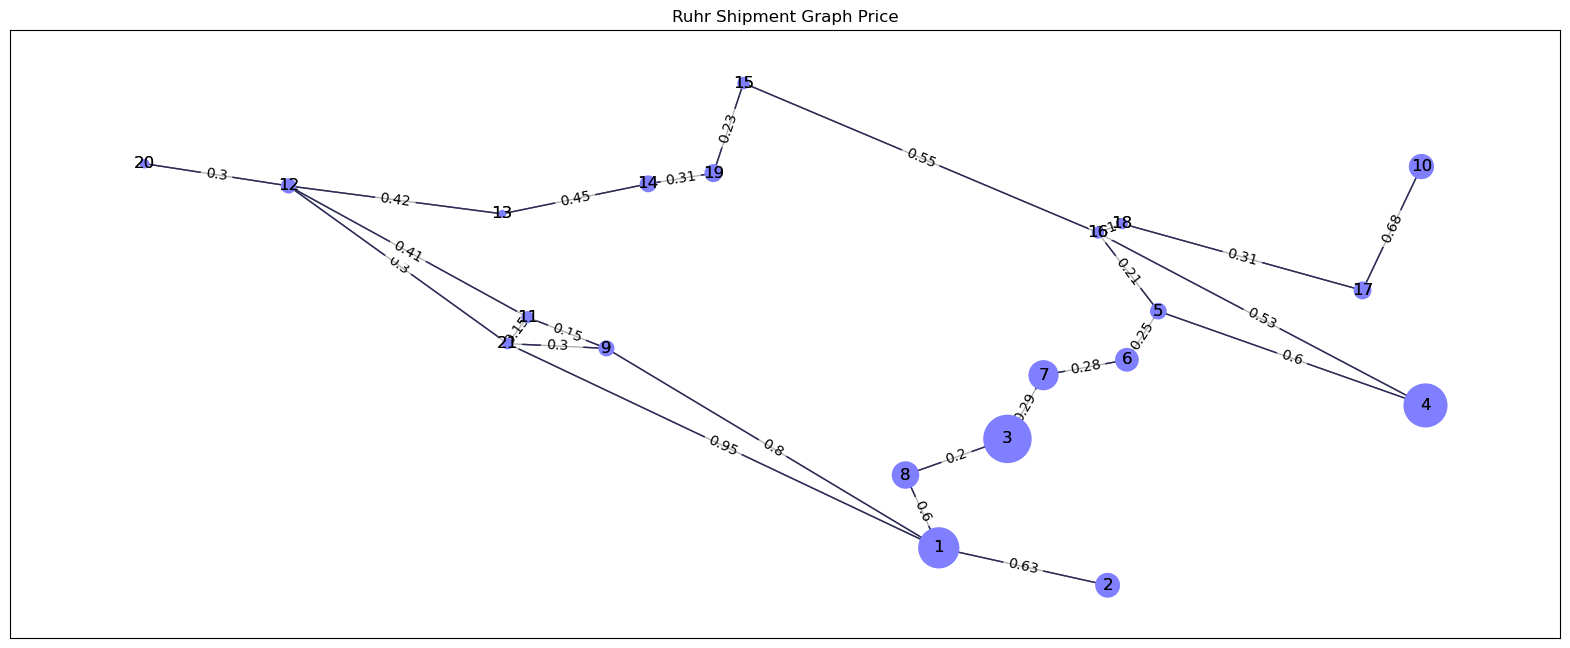

In [15]:
# Draw network 



fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Price')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'price') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph price')
plt.show()

In [16]:
#returns frequency for degree 0, 1,2...
nx.degree_histogram(G)

[0, 3, 11, 3, 4]

In [17]:
list(nx.center(G,weight='distance')) # centers of the graph

[8]

In [18]:
nx.average_degree_connectivity(G, weight="distance")

{4: 2.7877367856717368,
 1: 3.1563963289005432,
 2: 2.593469543631851,
 3: 3.3446462240746255}

In [19]:
degree_centrality=nx.degree_centrality(G)
df=pd.DataFrame.from_dict(degree_centrality, orient='index')
df.rename(columns={0:'degree'}, inplace=True)


betweenness_centrality=nx.betweenness_centrality(G)
df['between']=betweenness_centrality

eigenvector_centrality=nx.eigenvector_centrality(G)
df['eigenvector']=betweenness_centrality

closeness_centrality=nx.closeness_centrality(G)
df['closeness']=closeness_centrality
df.to_csv('centrality')
df

,degree,between,eigenvector,closeness
1,0.20,0.265789,0.265789,0.253165
2,0.05,0.000000,0.000000,0.204082
8,0.10,0.218421,0.218421,0.253165
9,0.15,0.017544,0.017544,0.224719
21,0.20,0.177193,0.177193,0.253165
3,0.10,0.218421,0.218421,0.253165
7,0.10,0.218421,0.218421,0.253165
4,0.10,0.000000,0.000000,0.232558
16,0.20,0.393860,0.393860,0.266667
5,0.15,0.225439,0.225439,0.256410


In [20]:
path = nx.shortest_path(G, 1, 19, weight="distance")
print(path)

[1, 21, 12, 13, 14, 19]


In [21]:
for v in G.nodes:
    for u in G.nodes:
        if u<=v: continue
        print('shortest path between ', v ,'and' , u)
        path=nx.shortest_path(G, u,v, weight='distance')
        print(path)

shortest path between  1 and 2
[2, 1]
shortest path between  1 and 8
[8, 1]
shortest path between  1 and 9
[9, 1]
shortest path between  1 and 21
[21, 1]
shortest path between  1 and 3
[3, 8, 1]
shortest path between  1 and 7
[7, 3, 8, 1]
shortest path between  1 and 4
[4, 5, 6, 7, 3, 8, 1]
shortest path between  1 and 16
[16, 5, 6, 7, 3, 8, 1]
shortest path between  1 and 5
[5, 6, 7, 3, 8, 1]
shortest path between  1 and 6
[6, 7, 3, 8, 1]
shortest path between  1 and 11
[11, 9, 1]
shortest path between  1 and 10
[10, 17, 18, 16, 5, 6, 7, 3, 8, 1]
shortest path between  1 and 17
[17, 18, 16, 5, 6, 7, 3, 8, 1]
shortest path between  1 and 12
[12, 21, 1]
shortest path between  1 and 13
[13, 12, 21, 1]
shortest path between  1 and 20
[20, 12, 21, 1]
shortest path between  1 and 14
[14, 13, 12, 21, 1]
shortest path between  1 and 19
[19, 14, 13, 12, 21, 1]
shortest path between  1 and 15
[15, 16, 5, 6, 7, 3, 8, 1]
shortest path between  1 and 18
[18, 16, 5, 6, 7, 3, 8, 1]
shortest path bet